In [2]:
url = 'https://en.wikipedia.org/wiki/Bitcoin'

In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Bitcoin - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Bitcoin - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History Toggle History subsection 1.1 Background 1.2 2008–2009: Creation 1.3 2010–2012: Early growth 1.4 2013–2014: First regulatory actions 1.5 2015–2019 1.6 2020–present 2 Design Toggle Design subsection 2.1 Units and divisibility 2.2 Blockchain 2.3 Addresses and transactions 2.4 Mining 2.5 Privacy and fungibility 2.6 Wallets 2.7 Scalability and decentralization challenges 3 Economics and usage Toggle Economics and usage subsection 3.1 Bitcoin's theoretical roots and ideology 3.2 Recognition as a currency and 

In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 681.0 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 309.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 1.5 MB/s eta 0:00:0000:0100:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=b54f495fd1b2414d861fef9babbbbd8120c5983013f987df9541a23ec19f7239
  Stored in directory: /home/zeera/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [8]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res[:20]

[('el salvador', 4.0),
 ('silk road', 4.0),
 ('private key', 4.0),
 ('central bank', 4.0),
 ('research published', 4.0),
 ('financial times', 4.0),
 ('york times', 4.0),
 ('^ lee', 4.0),
 ('bbc news', 4.0),
 ('^ vigna', 4.0),
 ('legal tender', 3.909090909090909),
 ('economic bubble', 3.8),
 ('business insider', 3.75),
 ('lightning network', 3.583333333333333),
 ('central banks', 3.571428571428571),
 ('bloomberg news', 3.5384615384615383),
 ('cryptocurrency exchanges', 3.484848484848485),
 ('satoshi nakamoto', 3.414285714285714),
 ('bitcoin mining', 3.2260030472320977),
 ('nakamoto', 1.7)]

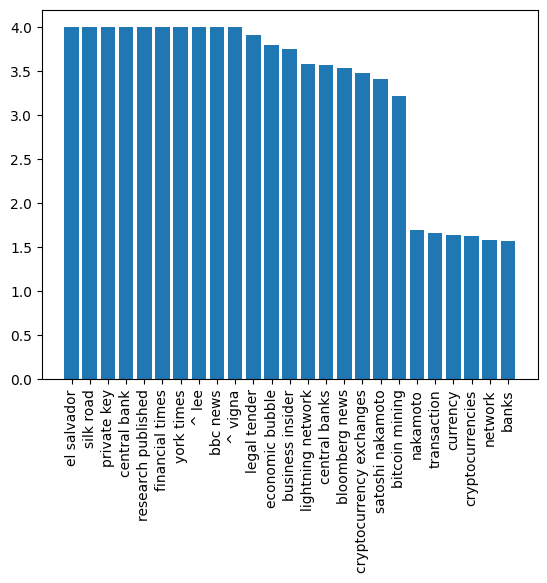

In [11]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:25])

In [ ]:
!{sys.executable} -m pip install wordcloud


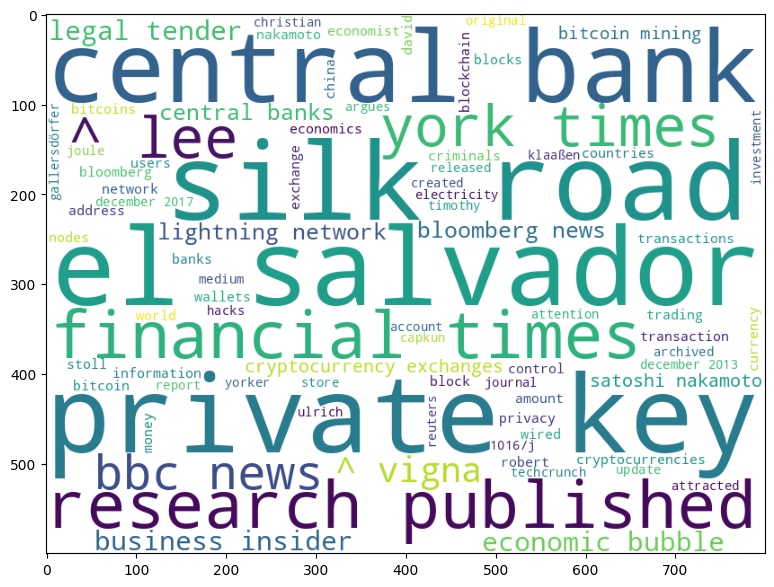

In [13]:
from wordcloud import WordCloud


wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

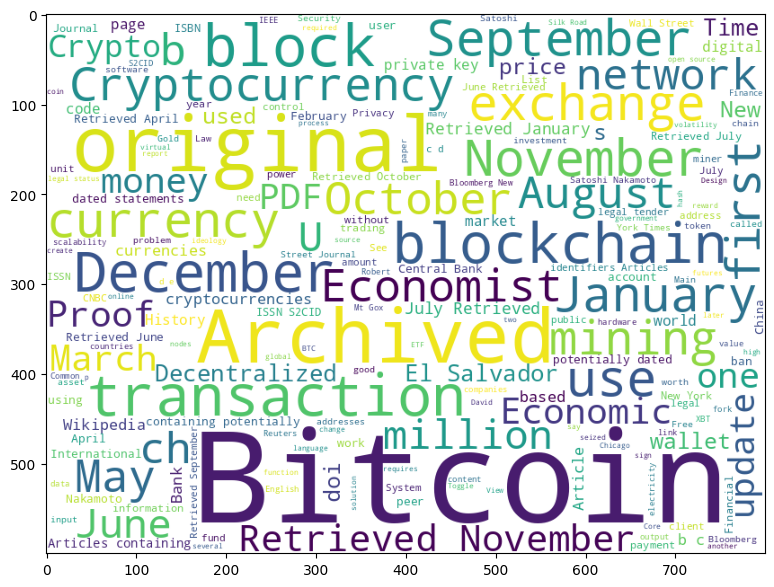

In [14]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))